# Ragged structures in $\sigma(gg \rightarrow H)$ within the hMSSM tuple

# Comparison of  $\sigma(gg \rightarrow H)$ from `hMSSM_13TeV.root` vs. from the original ASCII provided by Allison

This notebook displays some irregular, ragged structures found among the values of $\sigma(gg \rightarrow H)$ along $\tan \beta$

**hMSSM TWiki:**

https://twiki.cern.ch/twiki/bin/view/LHCPhysics/LHCHXSWGMSSMNeutral#ROOT_histograms_MSSM_benchmark_s

**Using the following file as input:**

hMSSM_13TeV.root:
https://twiki.cern.ch/twiki/pub/LHCPhysics/HXSWG3LowTanB/hMSSM_13TeV.root


In [1]:
import os
setup_script = os.path.join(os.environ['ENV_JUPYTER_SETUPS_DIR'], 'setup_sci_env_basic.py')
%run $setup_script

In [2]:
import functools
import plotting.hMSSM as hMSSM_plot
import matplotlib_utils.plot_func as plu
import itertools

In [3]:
load_mpl_style('ATLAS.mplstyle')

Loading in datasets

In [4]:
amccarn_header = ['tanb', 'mA', 'xsec_gg_H', 'xsec_bb_H', 'mH', 'gt', 'gb']

In [5]:
query_str = 'mA >= 180.0 & mA <= 600.0 & tanb >= 1.0 & tanb <= 5.0'

In [6]:
root = pd.read_csv('./data/ascii/written_with_mssm_tools_mA_5.0_tanb_0.1_int_on.dat', delim_whitespace=True).query(query_str)
amccarn = {}
for variation in [1,2,3,4,5,6,7]:
    file = "./data/amccarn/hMSSM_13000_higgs_H_68cl_0_{}.txt".format(variation)
    amccarn[variation] = pd.read_csv(file, names=amccarn_header, delim_whitespace=True).query(query_str)

## $\sigma(gg \rightarrow H)$

### Profile along $\tan\beta$ for a fixed $m_{A}$

#### Fixed $m_{A} = 300$

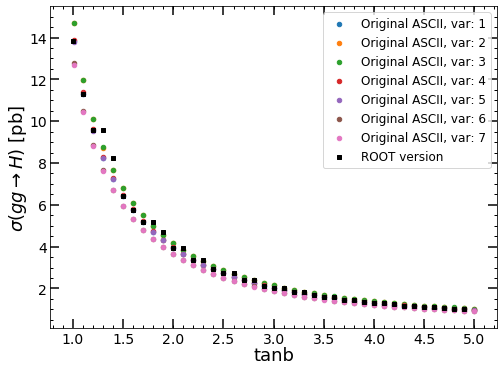

In [7]:
f,a = plt.subplots()
for i, (var, df) in enumerate(amccarn.items()):
    legend = "Original ASCII, var: {}".format(var)
    df.query('mA == 300.0').plot.scatter('tanb', 'xsec_gg_H', ax=a, c="C{}".format(i), label=legend)
    a.set_xlabel(r"$\tan \beta$")
root.query('mA == 300.0').plot.scatter('tanb', 'xsec_gg_H', ax=a, c='k', marker='s', label='ROOT version')
a.set_ylabel(r"$\sigma(gg \rightarrow H)$ [pb]");

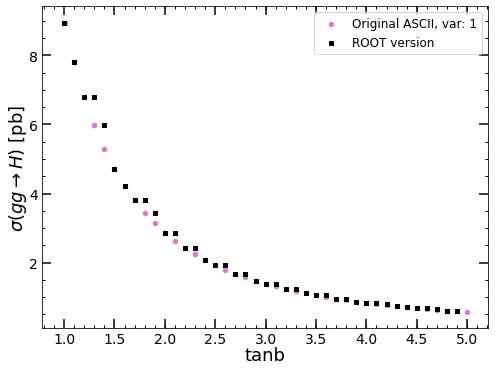

In [8]:
f,a = plt.subplots()
var = 1
legend = "Original ASCII, var: {}".format(var)
amccarn[var].query('mA == 400.0').plot.scatter('tanb', 'xsec_gg_H', ax=a, c="C{}".format(i), label=legend)
a.set_xlabel(r"$\tan \beta$")
root.query('mA == 400.0').plot.scatter('tanb', 'xsec_gg_H', ax=a, c='k', marker='s', label='ROOT version')
a.set_ylabel(r"$\sigma(gg \rightarrow H)$ [pb]");

$\sigma(gg \rightarrow H)$ displays some ragged structures along $\tan \beta$, even though $\tan \beta$ is increased $\sigma(gg \rightarrow H)$ stays the same for some pairs of points

#### Fixed $m_{A} = 400$

This feature is present along all values of $m_{A}$, here is one for $m_{A} = 400$ GeV

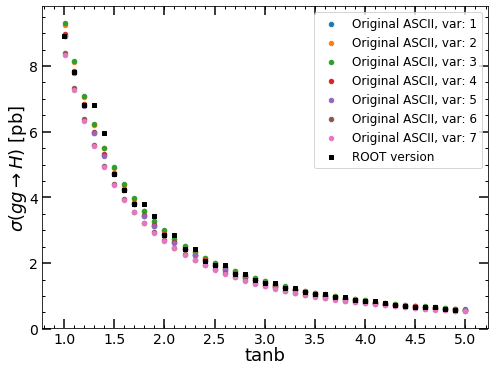

In [9]:
f,a = plt.subplots()
for i, (var, df) in enumerate(amccarn.items()):
    legend = "Original ASCII, var: {}".format(var)
    df.query('mA == 400.0').plot.scatter('tanb', 'xsec_gg_H', ax=a, c="C{}".format(i), label=legend)
    a.set_xlabel(r"$\tan \beta$")
root.query('mA == 400.0').plot.scatter('tanb', 'xsec_gg_H', ax=a, c='k', marker='s', label='ROOT version')
a.set_ylabel(r"$\sigma(gg \rightarrow H)$ [pb]");

For comparison here is how $\mathcal{B}r(H \rightarrow hh)$ and $m_{H}$ looks like

<font color='red' size=5>
**This ragged structure unfortunately also affects the heatmap and contour plots, as you can see below.**
</font>

Preparing variables for contour plot

In [10]:
dfmesh = amccarn[1].pivot('mA', 'tanb', 'xsec_gg_H')
xi, yi, zi = dfmesh.index.values, dfmesh.columns.values, dfmesh.values.T

### Heatmap plot

With ROOT version

In [11]:
dfmesh = root.pivot('mA', 'tanb', 'xsec_gg_H')
xi, yi, zi = dfmesh.index.values, dfmesh.columns.values, dfmesh.values.T

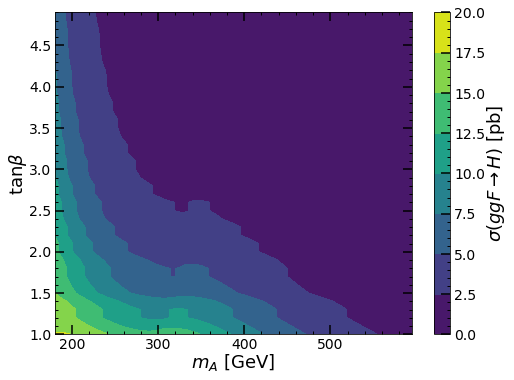

In [12]:
f,a = plt.subplots()
cs = a.contourf(xi,yi,zi)
cb = f.colorbar(cs)
cb.set_label(r'$\sigma(ggF \rightarrow H)$ [pb]')
a.set_xlabel(r"$m_{A}$ [GeV]")
a.set_ylabel(r"$\tan \beta$");

With original ASCII

In [13]:
dfmesh = amccarn[1].pivot('mA', 'tanb', 'xsec_gg_H')
xi, yi, zi = dfmesh.index.values, dfmesh.columns.values, dfmesh.values.T

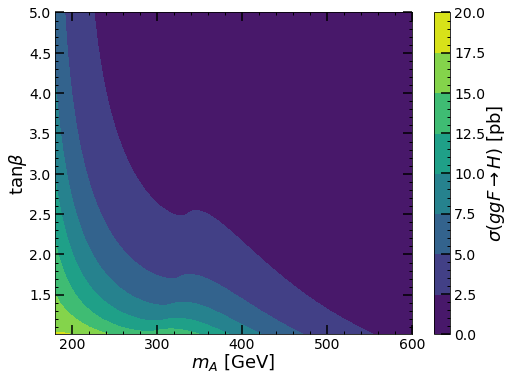

In [14]:
f,a = plt.subplots()
cs = a.contourf(xi,yi,zi)
cb = f.colorbar(cs)
cb.set_label(r'$\sigma(ggF \rightarrow H)$ [pb]')
a.set_xlabel(r"$m_{A}$ [GeV]")
a.set_ylabel(r"$\tan \beta$");

### Contour plot

With ROOT version

In [15]:
dfmesh = root.pivot('mA', 'tanb', 'xsec_gg_H')
xi, yi, zi = dfmesh.index.values, dfmesh.columns.values, dfmesh.values.T

<a list of 6 text.Text objects>

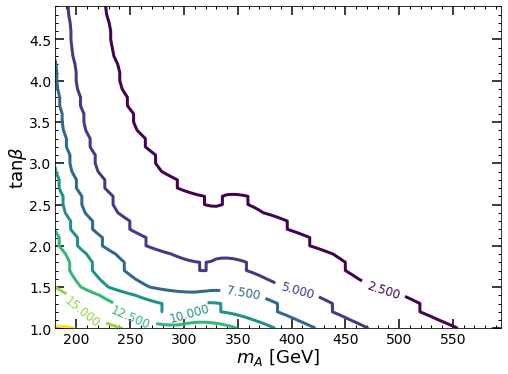

In [16]:
f,a = plt.subplots()
cs = a.contour(xi,yi,zi)
a.set_xlabel(r"$m_{A}$ [GeV]")
a.set_ylabel(r"$\tan \beta$");
plt.clabel(cs, inline=True)

With Original ASCII

In [17]:
dfmesh = amccarn[1].pivot('mA', 'tanb', 'xsec_gg_H')
xi, yi, zi = dfmesh.index.values, dfmesh.columns.values, dfmesh.values.T

<a list of 6 text.Text objects>

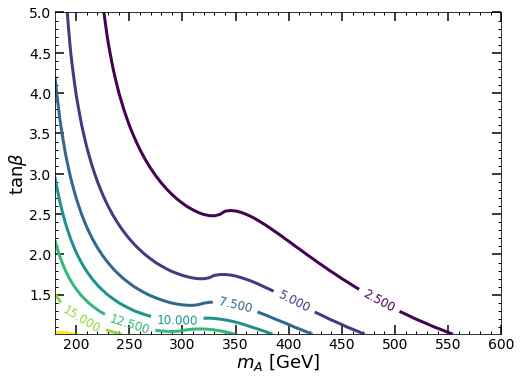

In [18]:
f,a = plt.subplots()
cs = a.contour(xi,yi,zi)
a.set_xlabel(r"$m_{A}$ [GeV]")
a.set_ylabel(r"$\tan \beta$");
plt.clabel(cs, inline=True)